### Àlex Correa Orri 1564967
### Júlia Pumares Benaiges 1566252

#### Dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [233]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


### MÒDULS I LLIBRERIES

In [234]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import os
import seaborn as sns
from scipy.stats import shapiro, spearmanr
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipympl
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
%matplotlib widget

### DIRECTORI DE TREBALL

In [235]:
os.getcwd()
path = 'C:/Users/alexc/OneDrive/Escritorio/UNI/3er/Aprenentatge Computacional/pràctiques/PRÀCTICA 2/Practica2-Classificacio'
os.chdir(path)
os.getcwd()
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### LECTURA DE DADES

In [236]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('train.csv')

### 1- EDA

In [237]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200,0,1,0,7,0.600,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500,1,0,1,53,0.700,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500,1,2,1,41,0.900,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500,0,0,0,10,0.800,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200,0,13,1,44,0.600,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.500,1,0,1,2,0.800,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.600,1,0,0,39,0.200,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.900,1,1,1,36,0.700,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.900,0,4,1,46,0.100,145,5,...,336,670,869,18,10,19,1,1,1,0


In [238]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Determinem com l'atribut objectiu el price_range (4 rangs de preu)

In [239]:
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, l-1]

#### Correlacions amb l'atribut a predir (price_range)

In [240]:
i=0
cols_corr = []
for col in dataset.columns:
    s, p = spearmanr(X[:,i], y)
    if (abs(s) > 0.10 and p < 0.05):
    #if True:
        cols_corr.append(col)
        print(str(i) + "- " + col)
        print(spearmanr(X[:,i], y))
        print("-----------------------------------------------------------------------------------")
    i = i + 1

0- battery_power
SpearmanrResult(correlation=0.19999095450908858, pvalue=1.7223057044179651e-19)
-----------------------------------------------------------------------------------
11- px_height
SpearmanrResult(correlation=0.13188410283565175, pvalue=3.2150109040420085e-09)
-----------------------------------------------------------------------------------
12- px_width
SpearmanrResult(correlation=0.1651336945326619, pvalue=1.0740563666925509e-13)
-----------------------------------------------------------------------------------
13- ram
SpearmanrResult(correlation=0.9170797841496084, pvalue=0.0)
-----------------------------------------------------------------------------------
20- price_range
SpearmanrResult(correlation=1.0, pvalue=0.0)
-----------------------------------------------------------------------------------


In [241]:
X = data[:, :l-1]

In [242]:
X0 = X
y0 = y

#### Scatter plot dels atributs més correlacionats (ram i battery_power) amb price_range

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
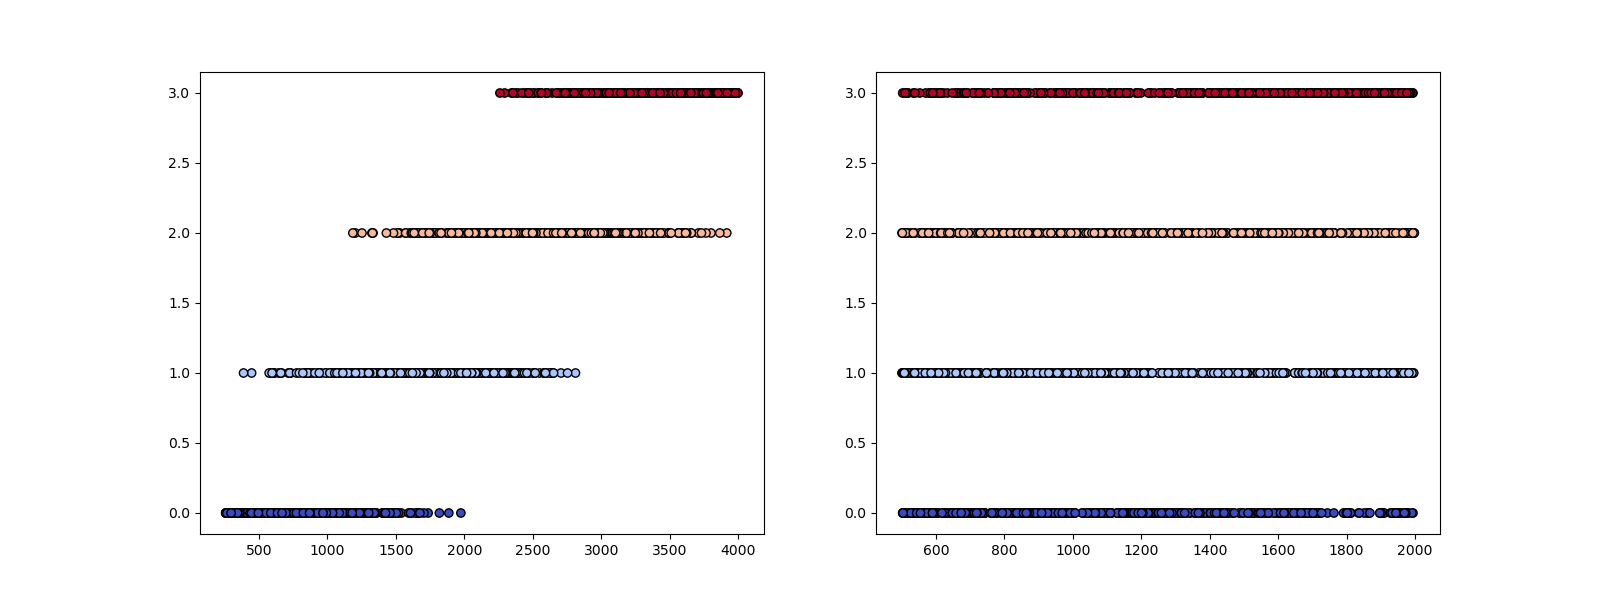

In [243]:
n_classes = 4
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,13], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

#### Dades amb distribució normal

In [244]:
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, l-1]

In [245]:
c = 0
for col in dataset.columns:
    stat, p = shapiro(X[:,c])
    if p > 0.05:
        print(c)
        print(p)
        print(dataset.columns[c])
        print('------------------------')
    c += 1
    
#no tenim dades amb distribució normal

#### Dades binàries

In [246]:
bool_cols = [col for col in dataset if np.isin(dataset[col].dropna().unique(), [0, 1]).all()]
bool_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

### 2- Preprocessing

#### Provem si val la pena tenir amplada i alçada o podem utilitzar la mida de la diagonal. Creem atribut nou, px_diag

In [247]:
dataset['px_diag'] = (dataset['px_height']**2+dataset['px_width']**2)**(1/2)
dataset = dataset.drop(['px_width','px_height'],axis=1)
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, dataset.columns.get_loc('price_range')]

In [248]:
i=0
cols_corr = []
for col in dataset.columns:
    s, p = spearmanr(X[:,i], y)
    if (abs(s) > 0.10 and p < 0.05):
    #if True:
        cols_corr.append(col)
        print(str(i) + "- " + col)
        print(spearmanr(X[:,i], y))
        print("-----------------------------------------------------------------------------------")
    i = i + 1

0- battery_power
SpearmanrResult(correlation=0.19999095450908858, pvalue=1.7223057044179651e-19)
-----------------------------------------------------------------------------------
11- ram
SpearmanrResult(correlation=0.9170797841496084, pvalue=0.0)
-----------------------------------------------------------------------------------
18- price_range
SpearmanrResult(correlation=1.0, pvalue=0.0)
-----------------------------------------------------------------------------------
19- px_diag
SpearmanrResult(correlation=0.17524012490562485, pvalue=2.9446410697169353e-15)
-----------------------------------------------------------------------------------


#### Creem dataset1 amb els atributs més correlacionats

In [249]:
dataset1 = dataset[cols_corr]
data1 = dataset1.values
l1 = len(dataset1.columns)
X1 = data1[:, :l1-1]
y1 = data1[:, dataset1.columns.get_loc('price_range')]

#### Normalitzar

In [250]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [251]:
Xn = standarize(X)
X1n = standarize(X1)

#### No tenim valors NaN

In [252]:
dataset.isnull().values.any()

False

#### Pairplot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
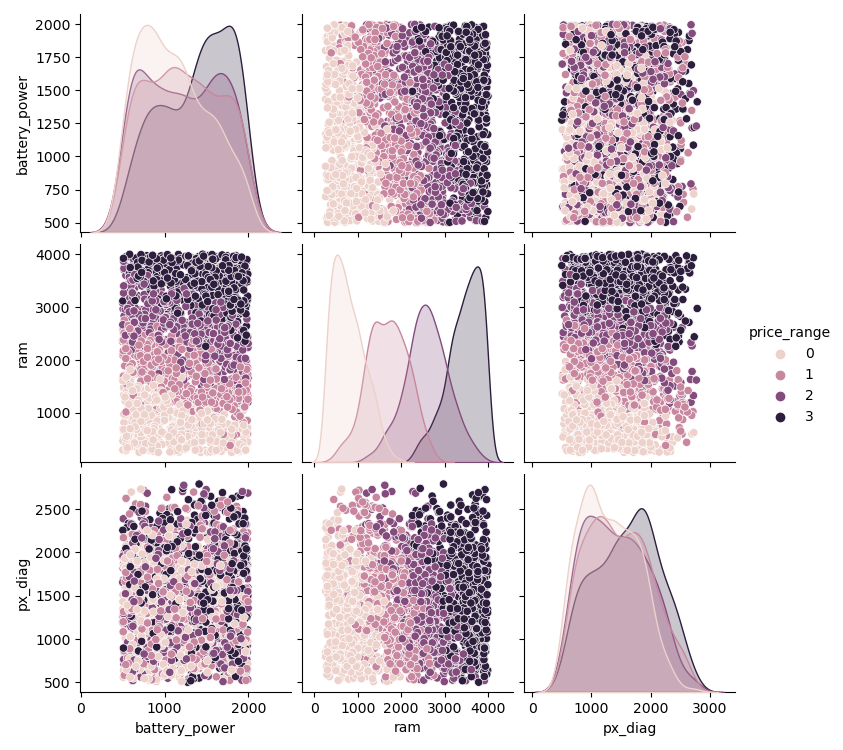

In [253]:
sns.pairplot(dataset1, hue='price_range')

#### Regressió logística i SVM amb tots els atributs

In [254]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))

C:\Users\alexc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct classification Logistic  0.5 % of the data:  0.621
Correct classification SVM       0.5 % of the data:  0.239
Correct classification Logistic  0.7 % of the data:  0.6516666666666666


C:\Users\alexc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct classification SVM       0.7 % of the data:  0.23166666666666666
Correct classification Logistic  0.8 % of the data:  0.6375


C:\Users\alexc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct classification SVM       0.8 % of the data:  0.23


#### Precision and Recall amb tots els atributs

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
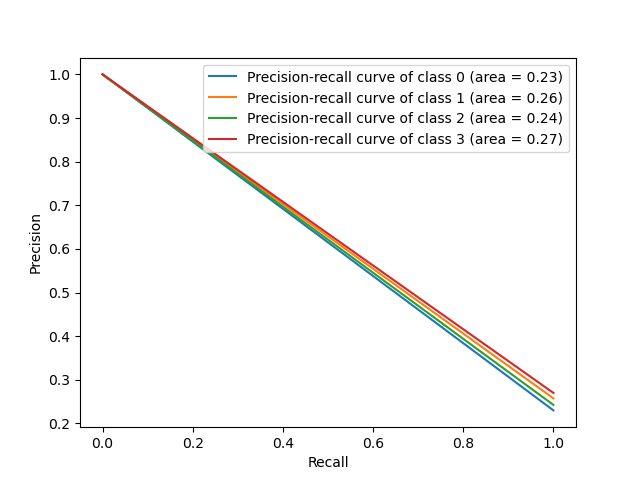

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
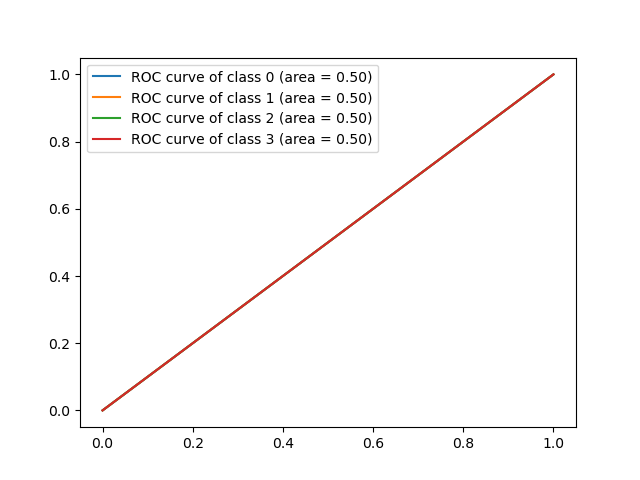

In [255]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

#### Regressió logística i SVM amb els atributs més correlacionats

In [256]:
X = X1
y = y1

In [257]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))

C:\Users\alexc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct classification Logistic  0.5 % of the data:  0.998
Correct classification SVM       0.5 % of the data:  0.248
Correct classification Logistic  0.7 % of the data:  0.9966666666666667


C:\Users\alexc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct classification SVM       0.7 % of the data:  0.24333333333333335
Correct classification Logistic  0.8 % of the data:  0.9875


C:\Users\alexc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct classification SVM       0.8 % of the data:  0.23


#### Precision and Recall amb els atributs més correlacionats

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
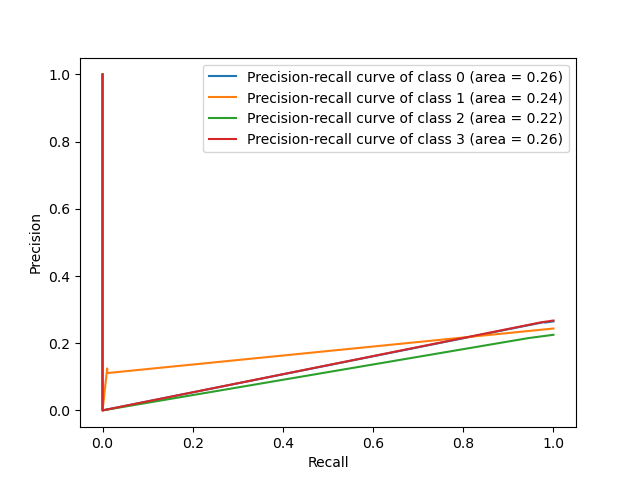

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
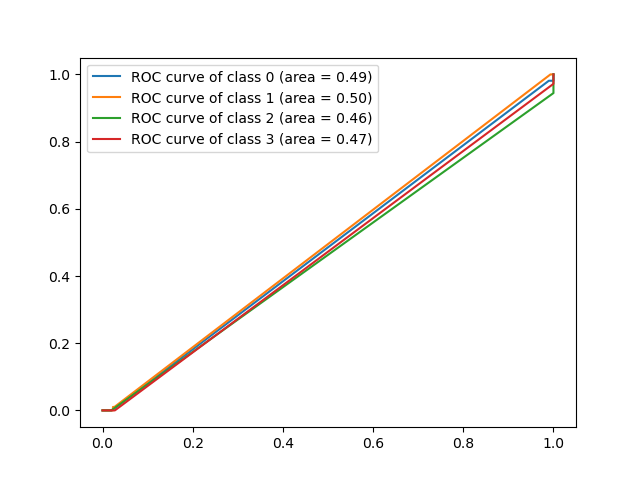

In [258]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [259]:
s=150
dataset1_r = dataset1.sample(n=s, random_state=10)
dataset1_r = dataset1_r[['battery_power', 'ram','price_range']]
#dataset1_r
